In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Processed/Processed3/cleaned_output_addcolumns_final_merged_cleaned_questions.csv'
df_clean = pd.read_csv(file_path, header = 0)
df_clean = df_clean.dropna()
print(df_clean.shape)
print(list(df_clean.columns))

Mounted at /content/drive
(534820, 12)
['Id', 'CommentCount', 'ViewCount', 'Tags', 'code_snippet', 'question_line_count', 'code_line_count', 'image', 'pd_score', 'Reputation', 'ReputationCategory', 'answered?']


In [ ]:
df_clean.head()

,Id,CommentCount,ViewCount,Tags,code_snippet,question_line_count,code_line_count,image,pd_score,Reputation,ReputationCategory,answered?
0,9134650,5,3121.0,|reactjs|sql|database|combinations|,0,38,0,0,0.160205,123.0,Low,1
1,15930661,0,112229.0,|javascript|react-native|highcharts|,0,9,0,0,0.012474,2173.0,Mid,1
2,15747536,5,1395.0,|javascript|reactjs|,1,27,22,0,0.071685,93.0,Low,1
3,16642259,3,32710.0,|javascript|design-patterns|reactjs|single-pag...,0,9,0,0,0.003057,2020.0,Mid,1
4,17248504,2,23631.0,|javascript|facebook|jslint|jshint|reactjs|,1,13,8,0,0.029622,4184.0,High,1


In [ ]:
df_clean['answered?'].value_counts()

,count
answered?,
1,429347
0,105473


In [ ]:
df_clean.describe()

,Id,CommentCount,ViewCount,code_snippet,question_line_count,code_line_count,image,pd_score,Reputation,answered?
count,5.348200e+05,534820.000000,5.348200e+05,534820.000000,534820.000000,534820.000000,534820.000000,534820.000000,5.348200e+05,534820.000000
mean,6.152046e+07,1.620648,2.910352e+03,0.878647,50.992059,42.129754,0.131940,0.560958,2.149911e+03,0.802788
std,1.151463e+07,2.305250,1.864710e+04,0.326537,58.101566,55.596214,0.338426,1.081086,9.330383e+03,0.397894
min,9.134650e+06,0.000000,4.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000
25%,5.380260e+07,0.000000,1.270000e+02,1.000000,16.000000,8.000000,0.000000,0.019785,5.300000e+01,1.000000
50%,6.330811e+07,1.000000,4.970000e+02,1.000000,35.000000,26.000000,0.000000,0.118064,2.730000e+02,1.000000
75%,7.102667e+07,2.000000,1.546000e+03,1.000000,65.000000,55.000000,0.000000,0.493036,1.207000e+03,1.000000
max,7.825299e+07,41.000000,2.769428e+06,1.000000,1664.000000,1658.000000,1.000000,16.666667,1.054815e+06,1.000000


In [ ]:
column_names = df_clean.columns
for column in column_names:
      print(column + " - " + str(df_clean[column].isnull().sum()))

Id - 0
CommentCount - 0
ViewCount - 0
Tags - 0
code_snippet - 0
question_line_count - 0
code_line_count - 0
image - 0
pd_score - 0
Reputation - 0
ReputationCategory - 0
answered? - 0


<ipython-input-7-0049d5e612a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='answered?', data=df_clean, palette='hls', stat='percent')
<ipython-input-7-0049d5e612a6>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['Tidak Terjawab', 'Terjawab'])


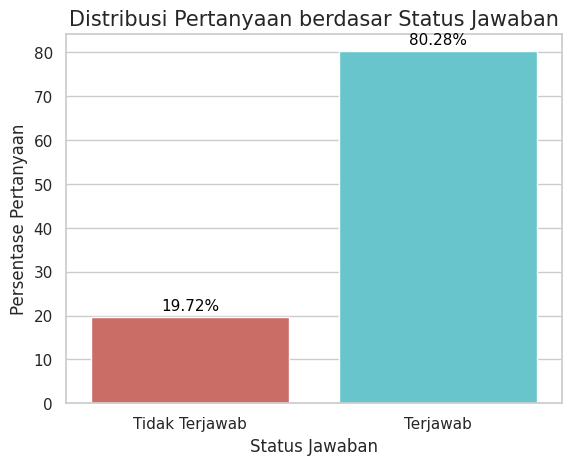

<Figure size 640x480 with 0 Axes>

In [ ]:
total = len(df_clean)
sns.set_style("whitegrid")

plot = sns.countplot(x='answered?', data=df_clean, palette='hls', stat='percent')

plot.set_xlabel('Status Jawaban', fontsize=12)
plot.set_ylabel('Persentase Pertanyaan', fontsize=12)
plot.set_xticklabels(['Tidak Terjawab', 'Terjawab'])
plot.set_title('Distribusi Pertanyaan berdasar Status Jawaban', fontsize=15)

for p in plot.patches:
    percentage = p.get_height()
    plot.annotate(f'{percentage:.2f}%',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='baseline',
                  fontsize=11, color='black',
                  xytext=(0, 5),
                  textcoords='offset points')

plt.show()
plt.savefig('count_plot_with_percentage.png')

In [ ]:
count_no_sub = len(df_clean[df_clean['answered?']==0])
count_sub = len(df_clean[df_clean['answered?']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of non-answered: ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of answered: ", pct_of_sub*100)

percentage of non-answered:  19.721214614262742
percentage of answered:  80.27878538573727


In [ ]:
numeric_cols = df_clean.select_dtypes(include=['number']).columns

df_mean = df_clean.groupby('answered?')[numeric_cols].mean()
print(df_mean)

                     Id  CommentCount    ViewCount  code_snippet  \
answered?                                                          
0          6.464309e+07      2.375139   422.045339      0.846548   
1          6.075335e+07      1.435301  3521.627057      0.886532   

           question_line_count  code_line_count     image  pd_score  \
answered?                                                             
0                    54.095342        45.294910  0.142785  0.000000   
1                    50.229709        41.352205  0.129275  0.698762   

            Reputation  answered?  
answered?                          
0          1545.370152        0.0  
1          2298.421817        1.0  


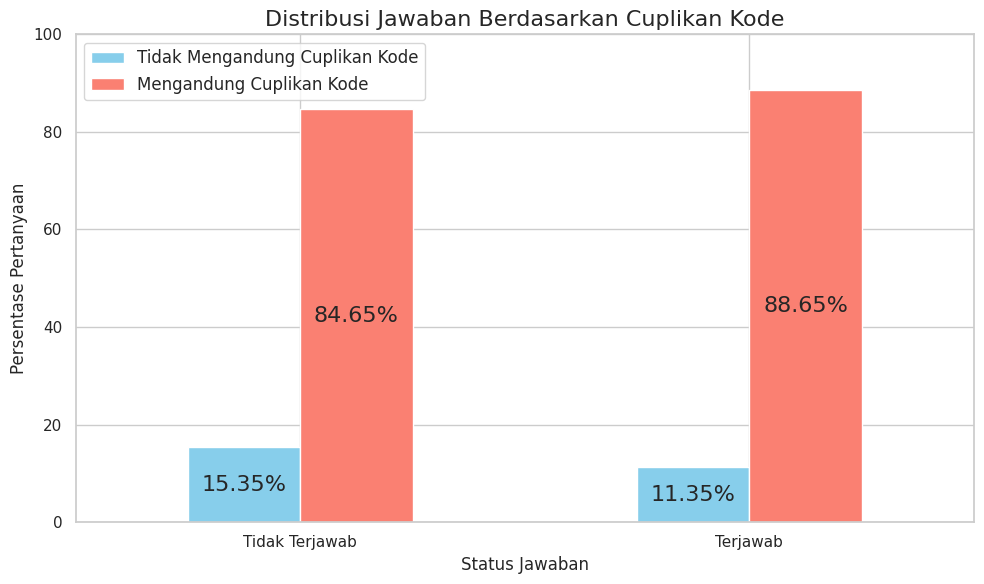

In [ ]:
table_x1 = pd.crosstab(df_clean['answered?'], df_clean['code_snippet'], normalize='index') * 100

sns.set_style("whitegrid")
ax = table_x1.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title('Distribusi Jawaban Berdasarkan Cuplikan Kode', fontsize=16)
plt.xlabel('Status Jawaban', fontsize=12)
plt.ylabel('Persentase Pertanyaan', fontsize=12)

ax.set_xticklabels(['Tidak Terjawab', 'Terjawab'], rotation=0)
plt.ylim(0, 100)

plt.legend(labels=['Tidak Mengandung Cuplikan Kode', 'Mengandung Cuplikan Kode'], fontsize=12, title_fontsize=12)

for i, container in enumerate(ax.containers):
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2,
                height / 2,
                f'{height:.2f}%',
                ha='center', va='center', fontsize=16)

plt.tight_layout()

plt.savefig('answer_distribution_based_on_code_snippet_percentage.png', dpi=300)

plt.show()

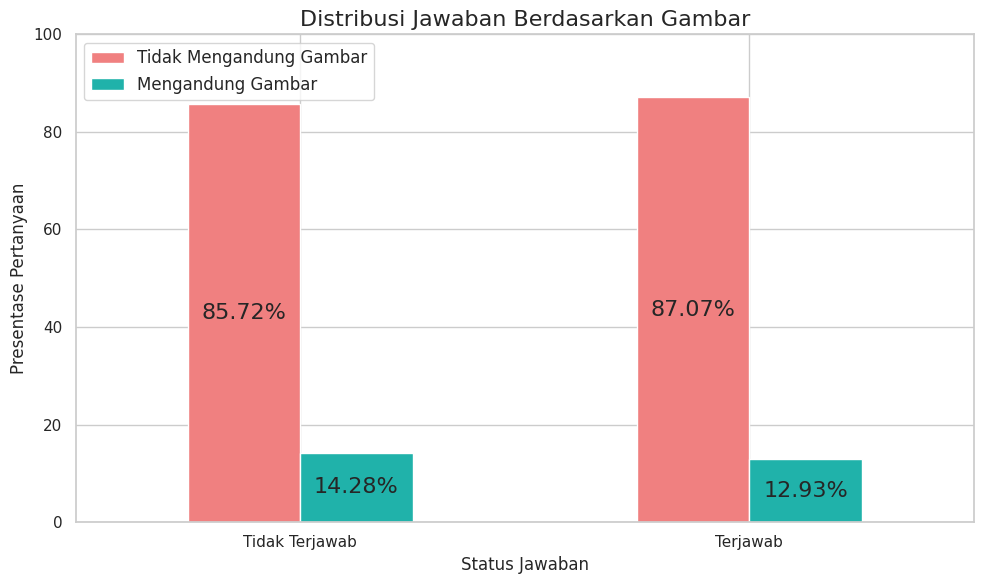

In [ ]:
table_x2 = pd.crosstab(df_clean['answered?'], df_clean['image'], normalize='index') * 100

sns.set_style("whitegrid")
ax = table_x2.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightseagreen'])

plt.title('Distribusi Jawaban Berdasarkan Gambar', fontsize=16)
plt.xlabel('Status Jawaban', fontsize=12)
plt.ylabel('Presentase Pertanyaan', fontsize=12)

ax.set_xticklabels(['Tidak Terjawab', 'Terjawab'], rotation=0)
plt.ylim(0, 100)

plt.legend(labels=['Tidak Mengandung Gambar', 'Mengandung Gambar'], fontsize=12, title_fontsize=12)

for i, container in enumerate(ax.containers):
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2,
                height / 2,
                f'{height:.2f}%',
                ha='center', va='center', fontsize=16)

plt.tight_layout()

plt.savefig('answer_distribution_based_on_image_percentage.png', dpi=300)

plt.show()

In [ ]:
df_clean['log_Reputation'] = np.log1p(df_clean['Reputation'])  # log(1 + Reputation) untuk menghindari log(0)
df_clean['sqrt_question_line_count'] = np.sqrt(df_clean['question_line_count'])
df_clean['sqrt_code_line_count'] = np.sqrt(df_clean['code_line_count'])

<ipython-input-13-0bdb7b05bff1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='answered?', y='log_Reputation', data=df_subset, palette='Blues')


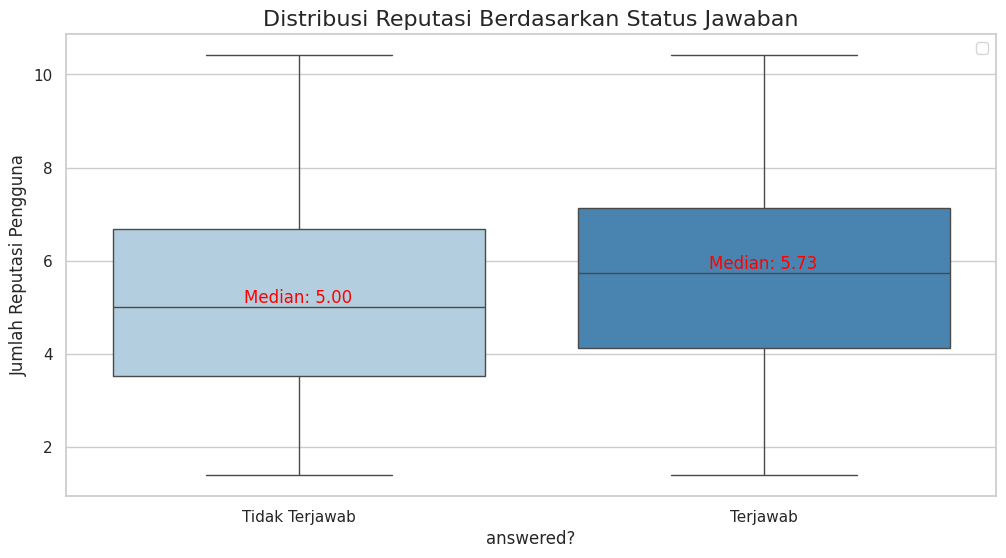

In [ ]:
q99 = df_clean['log_Reputation'].quantile(0.99)
df_subset = df_clean[df_clean['log_Reputation'] <= q99]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.boxplot(x='answered?', y='log_Reputation', data=df_subset, palette='Blues')

median_answered = df_subset[df_subset['answered?'] == 1]['log_Reputation'].median()
median_unanswered = df_subset[df_subset['answered?'] == 0]['log_Reputation'].median()

plt.text(0, median_unanswered + 0.1, f'Median: {median_unanswered:.2f}', color='red', fontsize=12, ha='center')
plt.text(1, median_answered + 0.1, f'Median: {median_answered:.2f}', color='red', fontsize=12, ha='center')

plt.title('Distribusi Reputasi Berdasarkan Status Jawaban', fontsize=16)
plt.ylabel('Jumlah Reputasi Pengguna', fontsize=12)
plt.xticks([0, 1], ['Tidak Terjawab', 'Terjawab'])

plt.savefig('answer_distribution_based_on_log_reputation.png', dpi=300)

plt.legend()
plt.show()

<ipython-input-14-94c605faa207>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['log_Reputation'])


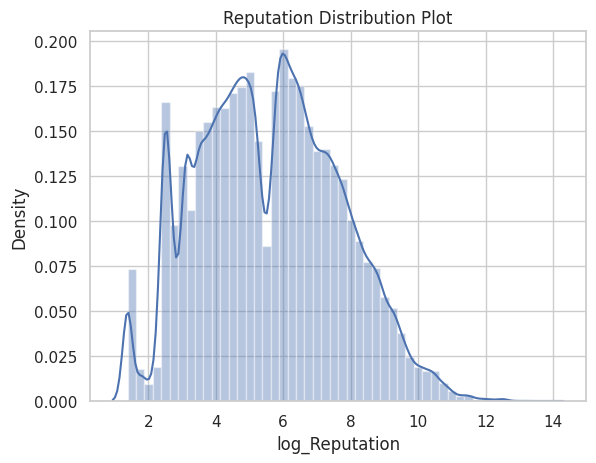

In [ ]:
plt.title('Reputation Distribution Plot')
sns.distplot(df_clean['log_Reputation'])
plt.show()

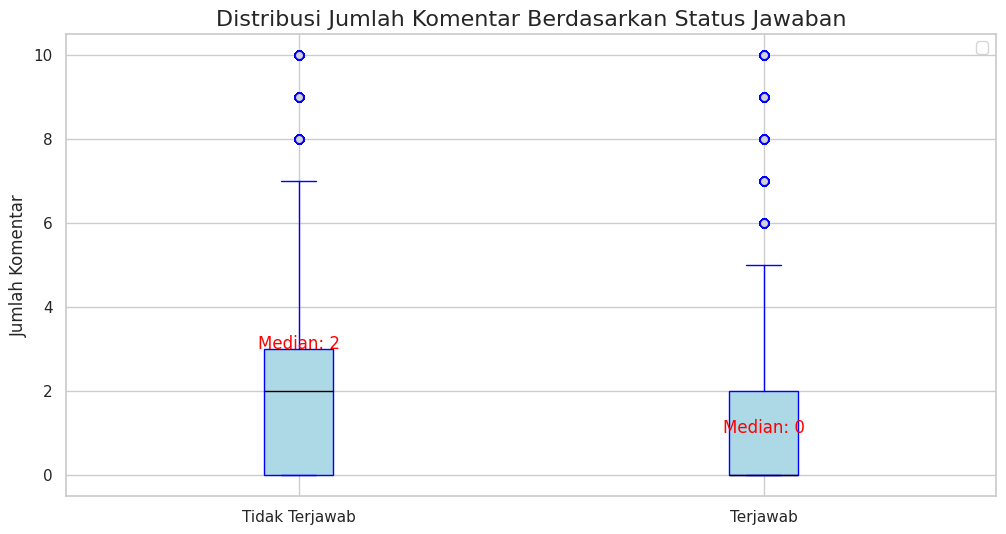

Median CommentCount Unanswered: 2.0
Median CommentCount Answered: 0.0


In [ ]:
q99 = df_clean['CommentCount'].quantile(0.99)
df_subset = df_clean[df_clean['CommentCount'] <= q99]

answered_status = [0, 1]
comment_count_data = [df_subset[df_subset['answered?'] == status]['CommentCount'] for status in answered_status]

plt.figure(figsize=(12, 6))
plt.boxplot(comment_count_data, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='lightgray', markeredgecolor='blue'))

plt.title('Distribusi Jumlah Komentar Berdasarkan Status Jawaban', fontsize=16)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks([1, 2], ['Tidak Terjawab', 'Terjawab'])

median_answered = df_subset[df_subset['answered?'] == 1]['CommentCount'].median()
median_unanswered = df_subset[df_subset['answered?'] == 0]['CommentCount'].median()

plt.text(1, median_unanswered + 1, f'Median: {median_unanswered:.0f}', color='red', fontsize=12, ha='center')
plt.text(2, median_answered + 1, f'Median: {median_answered:.0f}', color='red', fontsize=12, ha='center')

plt.legend()
plt.savefig('boxplot_commentcount.png', dpi=300)

plt.show()

print(f'Median CommentCount Unanswered: {median_unanswered}')
print(f'Median CommentCount Answered: {median_answered}')

<ipython-input-16-8caa1a44c566>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['CommentCount'])


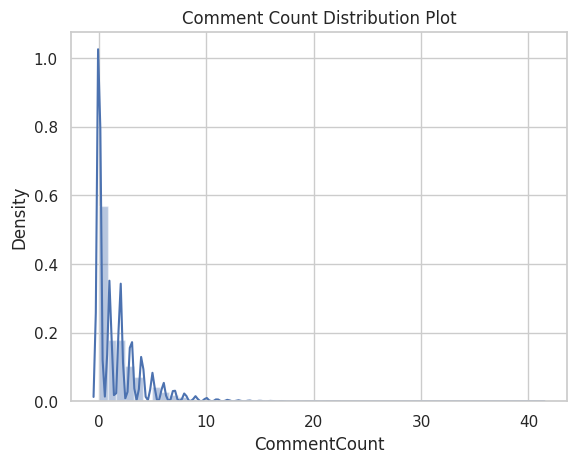

In [ ]:
plt.title('Comment Count Distribution Plot')
sns.distplot(df_clean['CommentCount'])
plt.show()

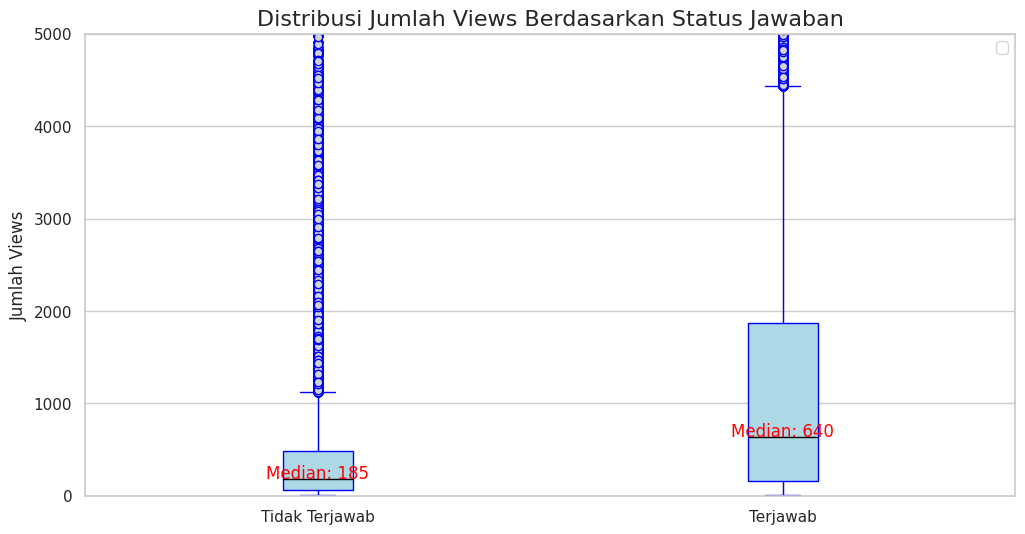

Median ViewCount Unanswered: 185.0
Median ViewCount Answered: 640.0


In [ ]:
q99 = df_clean['ViewCount'].quantile(0.99)
df_subset = df_clean[df_clean['ViewCount'] <= q99]

answered_status = [0, 1]
view_count_data = [df_subset[df_subset['answered?'] == status]['ViewCount'] for status in answered_status]

plt.figure(figsize=(12, 6))
plt.boxplot(view_count_data, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='lightgray', markeredgecolor='blue'))

plt.title('Distribusi Jumlah Views Berdasarkan Status Jawaban', fontsize=16)
plt.ylabel('Jumlah Views', fontsize=12)
plt.xticks([1, 2], ['Tidak Terjawab', 'Terjawab'])

plt.ylim(0, 5000)

median_answered = df_subset[df_subset['answered?'] == 1]['ViewCount'].median()
median_unanswered = df_subset[df_subset['answered?'] == 0]['ViewCount'].median()

plt.text(1, min(median_unanswered, 5000), f'Median: {median_unanswered:.0f}', color='red', ha='center')
plt.text(2, min(median_answered, 5000), f'Median: {median_answered:.0f}', color='red', ha='center')

plt.legend()
plt.savefig('view_count_distribution_based_on_answered_status.png', dpi=300)

plt.show()

print(f'Median ViewCount Unanswered: {median_unanswered}')
print(f'Median ViewCount Answered: {median_answered}')

<ipython-input-18-aebf240038c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['ViewCount'])


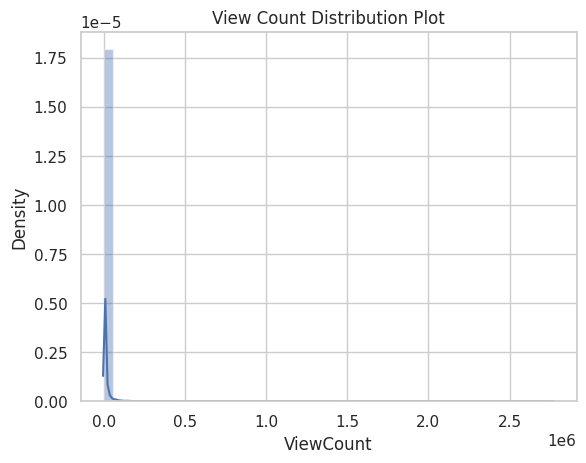

In [ ]:
plt.title('View Count Distribution Plot')
sns.distplot(df_clean['ViewCount'])
plt.show()

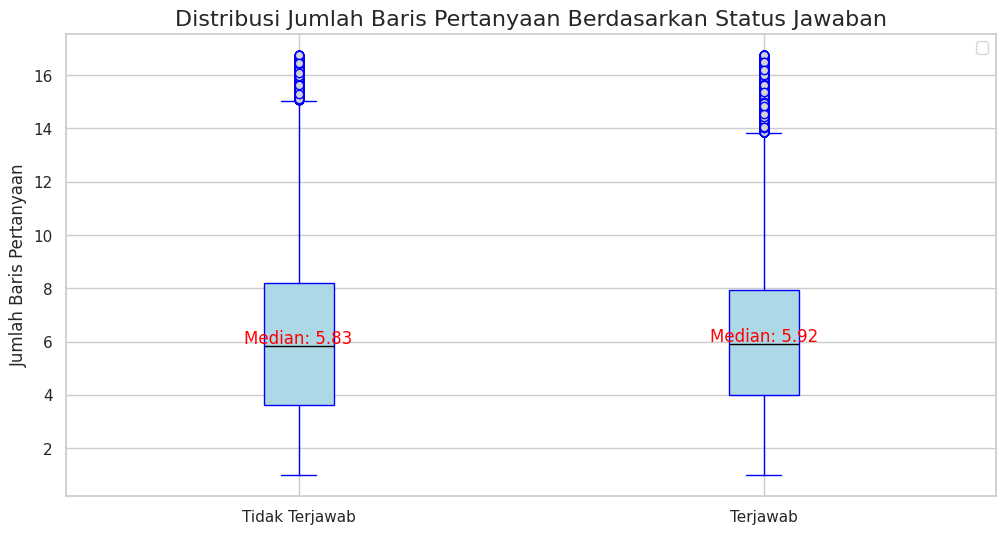

Median sqrt_question_line_count Unanswered: 5.830951894845301
Median sqrt_question_line_count Answered: 5.916079783099616


In [ ]:
q99 = df_clean['sqrt_question_line_count'].quantile(0.99)
df_subset = df_clean[df_clean['sqrt_question_line_count'] <= q99]

answered_status = [0, 1]
question_line_count_data = [df_subset[df_subset['answered?'] == status]['sqrt_question_line_count'] for status in answered_status]

plt.figure(figsize=(12, 6))
plt.boxplot(question_line_count_data, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='lightgray', markeredgecolor='blue'))

plt.title('Distribusi Jumlah Baris Pertanyaan Berdasarkan Status Jawaban', fontsize=16)
plt.ylabel('Jumlah Baris Pertanyaan', fontsize=12)
plt.xticks([1, 2], ['Tidak Terjawab', 'Terjawab'])

median_answered = df_subset[df_subset['answered?'] == 1]['sqrt_question_line_count'].median()
median_unanswered = df_subset[df_subset['answered?'] == 0]['sqrt_question_line_count'].median()

plt.text(1, median_unanswered + 0.1, f'Median: {median_unanswered:.2f}', color='red', ha='center')
plt.text(2, median_answered + 0.1, f'Median: {median_answered:.2f}', color='red', ha='center')

plt.legend()
plt.savefig('question_line_count_distribution_based_on_answered_status.png', dpi=300)

plt.show()

print(f'Median sqrt_question_line_count Unanswered: {median_unanswered}')
print(f'Median sqrt_question_line_count Answered: {median_answered}')

<ipython-input-20-7b890158bf7d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['sqrt_question_line_count'])


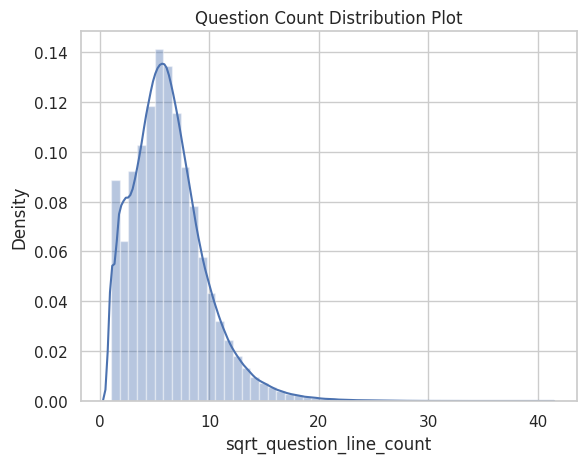

In [ ]:
plt.title('Question Count Distribution Plot')
sns.distplot(df_clean['sqrt_question_line_count'])
plt.show()

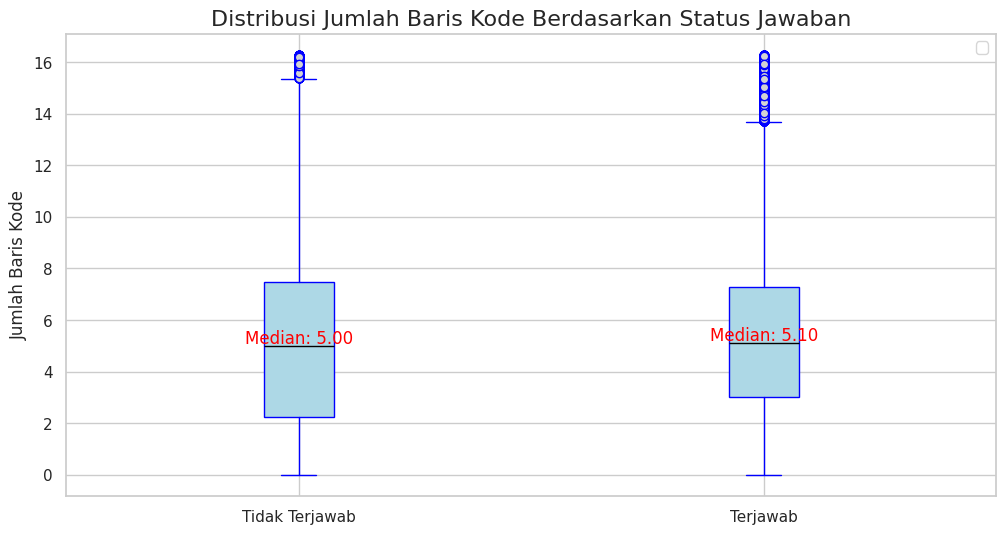

Median sqrt_code_line_count Unanswered: 5.0
Median sqrt_code_line_count Answered: 5.0990195135927845


In [ ]:
q99 = df_clean['sqrt_code_line_count'].quantile(0.99)
df_subset = df_clean[df_clean['sqrt_code_line_count'] <= q99]

answered_status = [0, 1]
code_line_count_data = [df_subset[df_subset['answered?'] == status]['sqrt_code_line_count'] for status in answered_status]

plt.figure(figsize=(12, 6))
plt.boxplot(code_line_count_data, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='lightgray', markeredgecolor='blue'))

plt.title('Distribusi Jumlah Baris Kode Berdasarkan Status Jawaban', fontsize=16)
plt.ylabel('Jumlah Baris Kode', fontsize=12)
plt.xticks([1, 2], ['Tidak Terjawab', 'Terjawab'])

median_answered = df_subset[df_subset['answered?'] == 1]['sqrt_code_line_count'].median()
median_unanswered = df_subset[df_subset['answered?'] == 0]['sqrt_code_line_count'].median()

plt.text(1, median_unanswered + 0.1, f'Median: {median_unanswered:.2f}', color='red', ha='center')
plt.text(2, median_answered + 0.1, f'Median: {median_answered:.2f}', color='red', ha='center')

plt.legend()
plt.savefig('code_line_count_distribution_based_on_answered_status.png', dpi=300)

plt.show()

print(f'Median sqrt_code_line_count Unanswered: {median_unanswered}')
print(f'Median sqrt_code_line_count Answered: {median_answered}')

<ipython-input-22-409f6e793edb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['sqrt_code_line_count'])


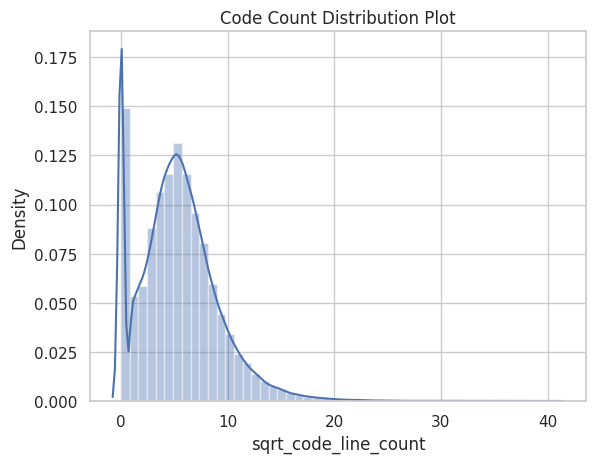

In [ ]:
plt.title('Code Count Distribution Plot')
sns.distplot(df_clean['sqrt_code_line_count'])
plt.show()

In [ ]:
cat_vars = ['Tags', 'ReputationCategory']

for var in cat_vars:
    cat_list = pd.get_dummies(df_clean[var], prefix=var, sparse=True)
    df_clean = df_clean.join(cat_list)

df_clean = df_clean.drop(columns=cat_vars)

print("Dataset columns after creating dummy variables: \n", df_clean.columns.values)

Dataset columns after creating dummy variables: 
 ['Id' 'CommentCount' 'ViewCount' ... 'ReputationCategory_High'
 'ReputationCategory_Low' 'ReputationCategory_Mid']


In [ ]:
X = df_clean[['code_snippet', 'image', 'log_Reputation', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']]
y = df_clean['answered?']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X.loc[:, ['log_Reputation', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']] = scaler.fit_transform(
    X[['log_Reputation', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']]
)

<ipython-input-25-cc35801c1939>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.46593839 -0.70302539  1.46593839 ... -0.70302539 -0.70302539
 -0.70302539]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, ['log_Reputation', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']] = scaler.fit_transform(


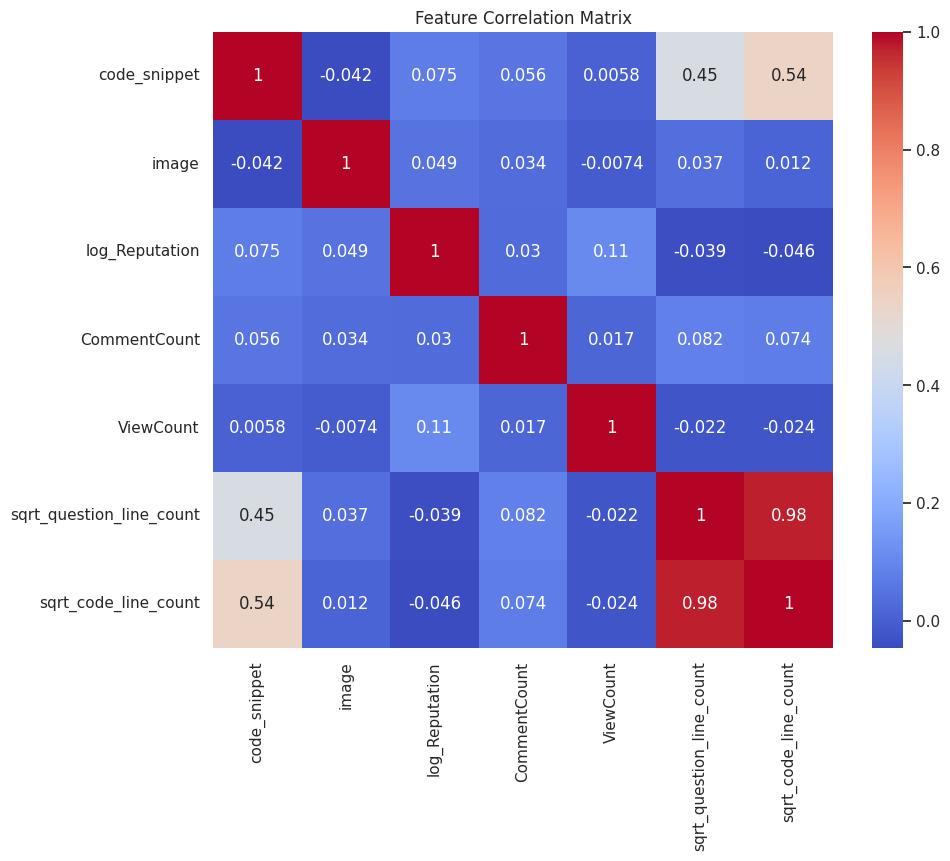

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

<Axes: >

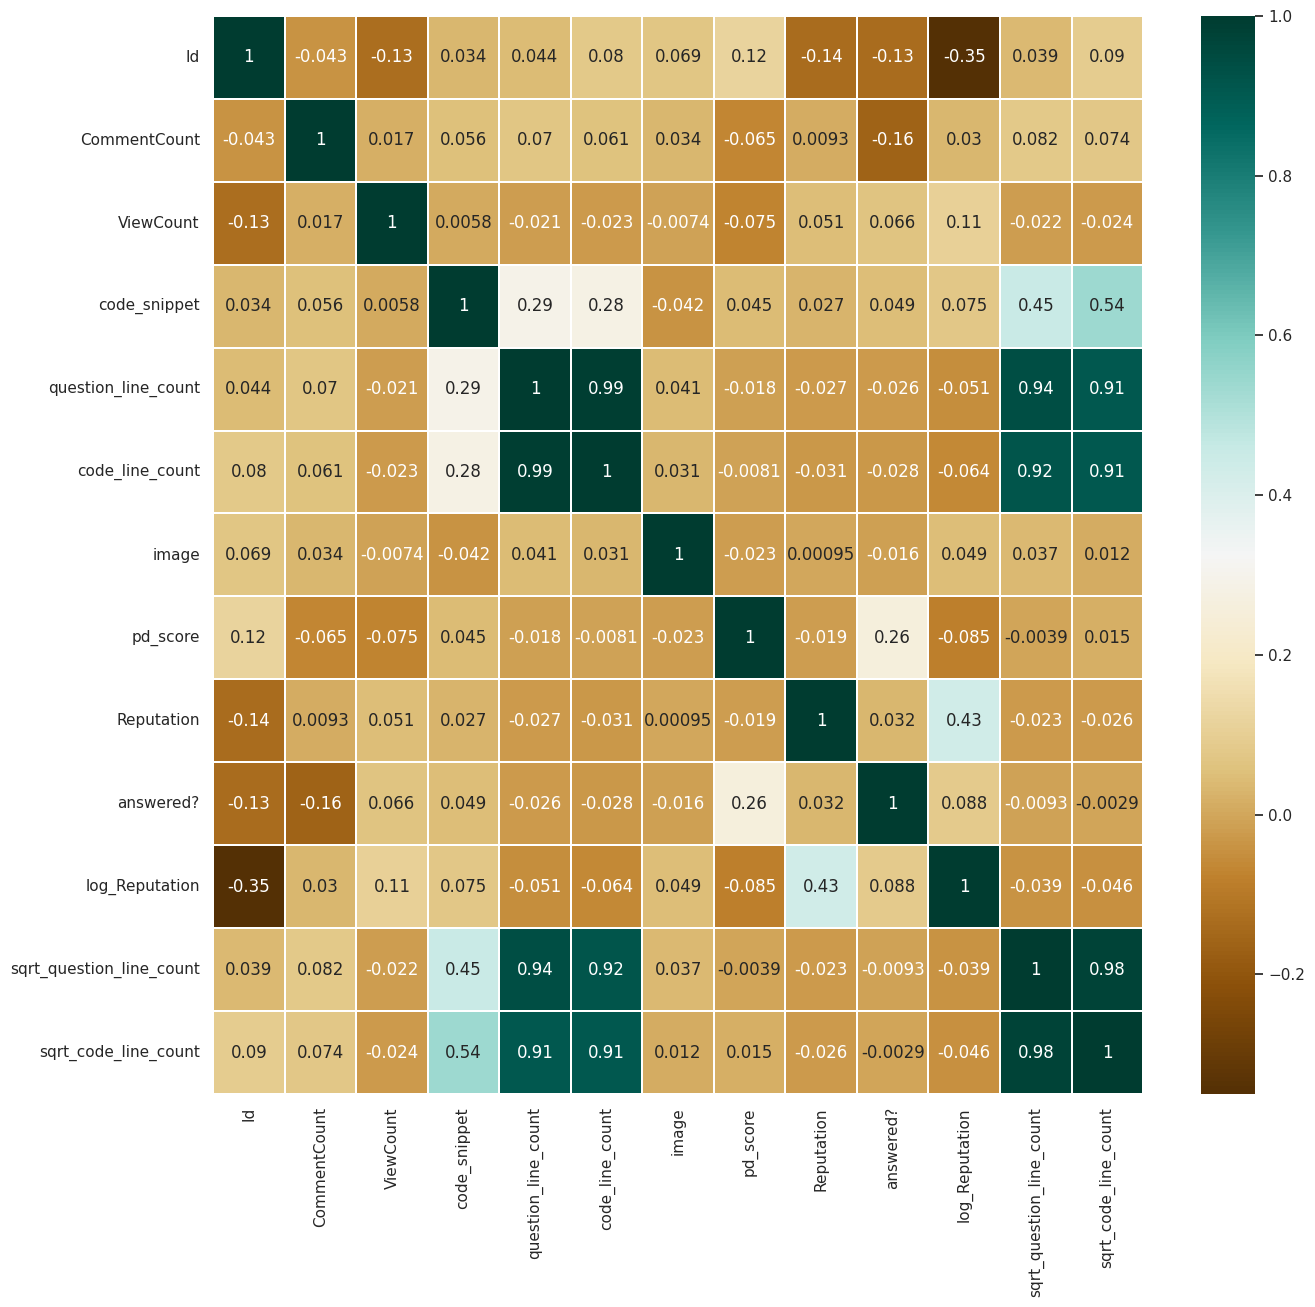

In [ ]:
num = df_clean.select_dtypes(include = [np.number])
corr_matrix = num.corr()

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 14))
sns.heatmap(data = corr_matrix, cmap = "BrBG", annot = True, linewidths = 0.2)

In [ ]:
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

os = SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=X.columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['answered?'])

print("Length of oversampled data is:", len(os_data_X))
print("Number of unanswered questions in oversampled data:", len(os_data_y[os_data_y['answered?'] == 0]))
print("Number of answered questions in oversampled data:", len(os_data_y[os_data_y['answered?'] == 1]))
print("Proportion of unanswered questions in oversampled data is:", len(os_data_y[os_data_y['answered?'] == 0]) / len(os_data_X))
print("Proportion of answered questions in oversampled data is:", len(os_data_y[os_data_y['answered?'] == 1]) / len(os_data_X))

Length of oversampled data is: 601030
Number of unanswered questions in oversampled data: 300515
Number of answered questions in oversampled data: 300515
Proportion of unanswered questions in oversampled data is: 0.5
Proportion of answered questions in oversampled data is: 0.5


In [ ]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=5)
rfe = rfe.fit(X, y)

print("Features selected by RFE: ", X.columns[rfe.support_].tolist())
print("Feature ranking: ", rfe.ranking_)

Features selected by RFE:  ['code_snippet', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']
Feature ranking:  [1 3 2 1 1 1 1]


In [ ]:
selected_columns = X.columns[rfe.support_].tolist()
X_selected = X[selected_columns]

print("Columns selected by RFE: ", selected_columns)

Columns selected by RFE:  ['code_snippet', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']


In [ ]:
import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.434395
         Iterations 11
                              Results: Logit
Model:                  Logit              Method:             MLE        
Dependent Variable:     answered?          Pseudo R-squared:   0.125      
Date:                   2024-12-16 11:45   AIC:                464662.2365
No. Observations:       534820             BIC:                464751.7540
Df Model:               7                  Log-Likelihood:     -2.3232e+05
Df Residuals:           534812             LL-Null:            -2.6555e+05
Converged:              1.0000             LLR p-value:        0.0000     
No. Iterations:         11.0000            Scale:              1.0000     
--------------------------------------------------------------------------
                          Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
const                     2

In [ ]:
alpha = 0.05

summary = result.summary2().tables[1]

significant_vars = summary[summary['P>|z|'] <= alpha]

significant_vars['Coef.'] = significant_vars['Coef.'].round(2)

print("\nVariabel yang signifikan pada alpha = 0.05:")
print(significant_vars[['Coef.', 'Std.Err.', 'P>|z|']])


Variabel yang signifikan pada alpha = 0.05:
                          Coef.  Std.Err.          P>|z|
const                      2.91  0.019558   0.000000e+00
code_snippet               0.38  0.014019  1.668463e-161
image                     -0.06  0.010642   1.681708e-08
log_Reputation             0.10  0.003743  1.046112e-169
CommentCount              -0.40  0.003405   0.000000e+00
ViewCount                 15.40  0.112433   0.000000e+00
sqrt_question_line_count  -0.35  0.017958   2.141838e-83
sqrt_code_line_count       0.31  0.018978   1.406419e-60


In [ ]:
alpha = 0.05

summary = result.summary2().tables[1]

significant_vars = summary[summary['P>|z|'] <= alpha]
significant_vars['P>|z|'] = significant_vars['P>|z|'].apply(lambda x: f"{x:.6f}")

print("\nVariabel yang signifikan pada alpha = 0.05:")
print(significant_vars[['Coef.', 'Std.Err.', 'P>|z|']])


Variabel yang signifikan pada alpha = 0.05:
                              Coef.  Std.Err.     P>|z|
const                      2.905396  0.019558  0.000000
code_snippet               0.379635  0.014019  0.000000
image                     -0.060042  0.010642  0.000000
log_Reputation             0.103930  0.003743  0.000000
CommentCount              -0.398633  0.003405  0.000000
ViewCount                 15.397883  0.112433  0.000000
sqrt_question_line_count  -0.347449  0.017958  0.000000
sqrt_code_line_count       0.311598  0.018978  0.000000


In [ ]:
odds_ratio = np.exp(result.params)
print("Odds Ratio:\n", odds_ratio)

Odds Ratio:
 const                       1.827248e+01
code_snippet                1.461751e+00
image                       9.417247e-01
log_Reputation              1.109522e+00
CommentCount                6.712369e-01
ViewCount                   4.866487e+06
sqrt_question_line_count    7.064881e-01
sqrt_code_line_count        1.365606e+00
dtype: float64


In [ ]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  1403  30211]
 [  1865 126967]]


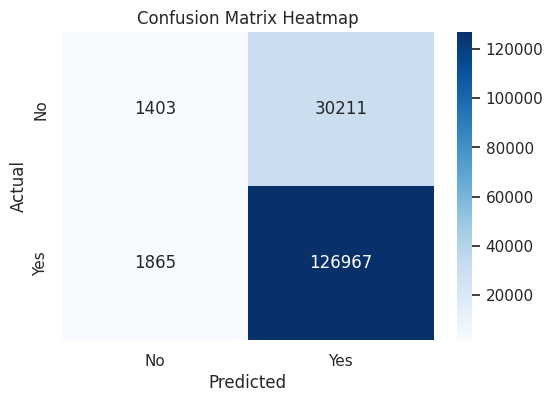

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.savefig('confusion_matrix_heatmap.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.04      0.08     31614
           1       0.81      0.99      0.89    128832

    accuracy                           0.80    160446
   macro avg       0.62      0.51      0.48    160446
weighted avg       0.73      0.80      0.73    160446



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

                    feature        VIF
0              code_snippet   1.195181
1                     image   1.152661
2            log_Reputation   1.018117
3              CommentCount   1.009478
4                 ViewCount   1.012609
5  sqrt_question_line_count  21.272748
6      sqrt_code_line_count  21.543906


Precision: 0.81
Recall: 0.99


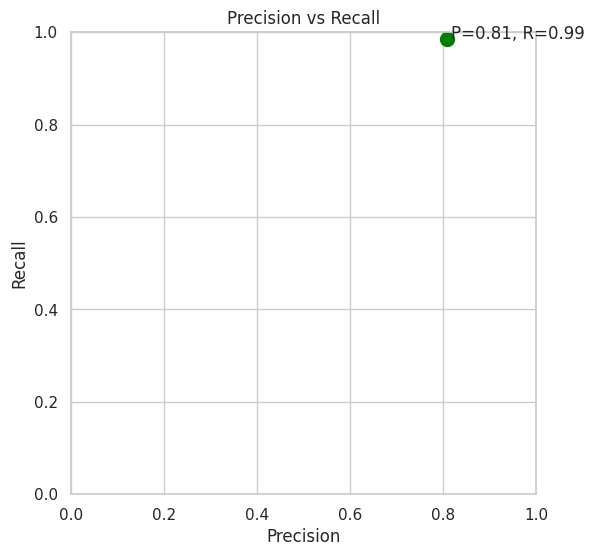

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

plt.figure(figsize=(6,6))
plt.scatter(precision, recall, color='green', s=100)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')
plt.grid(True)
plt.text(precision + 0.01, recall, f'P={precision:.2f}, R={recall:.2f}')
plt.savefig('precision_recall_scatter.png')
plt.show()

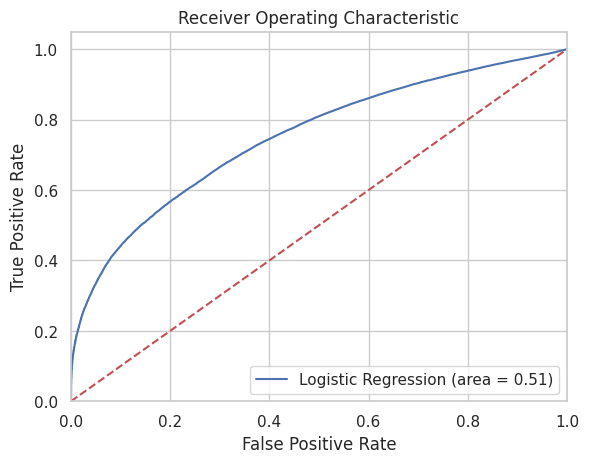

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
new_data = pd.DataFrame({
    'code_snippet': [0],
    'image': [1],
    'log_Reputation': [np.log1p(3000)],
    'CommentCount': [5],
    'ViewCount': [150],
    'sqrt_question_line_count': [np.sqrt(12)],
    'sqrt_code_line_count': [np.sqrt(20)]
})

new_pred_prob = logreg.predict_proba(new_data)[:, 1]
new_pred = [1 if x > 0.5 else 0 for x in new_pred_prob]
print("Prediction Answered?: ", new_pred)

Prediction Answered?:  [1]


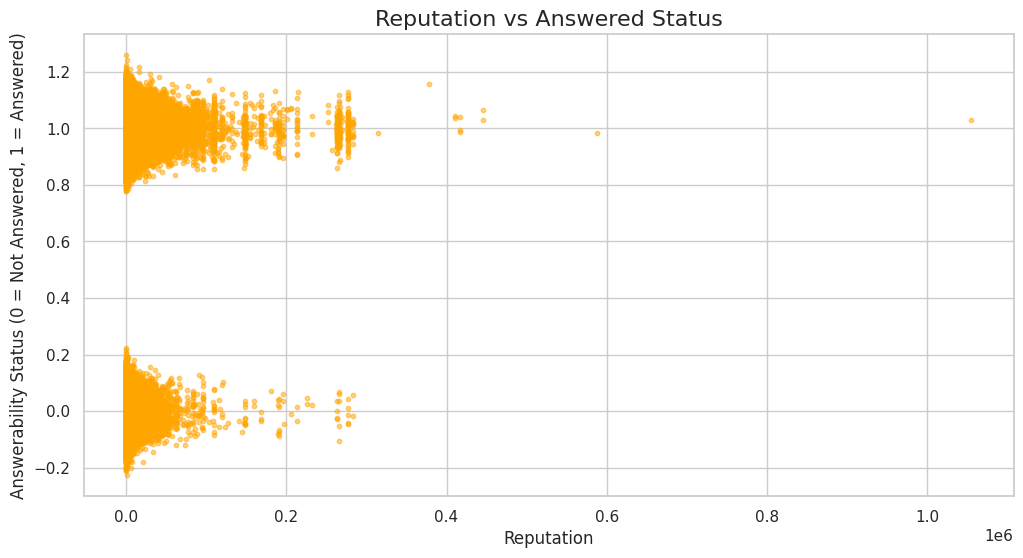

In [ ]:
jittered_answered = df_clean['answered?'] + np.random.normal(0, 0.05, size=len(df_clean))

plt.figure(figsize=(12, 6))
plt.scatter(df_clean['Reputation'], jittered_answered, alpha=0.5, color='orange', s=10)

plt.title('Reputation vs Answered Status', fontsize=16)
plt.xlabel('Reputation', fontsize=12)
plt.ylabel('Answerability Status (0 = Not Answered, 1 = Answered)', fontsize=12)

plt.show()

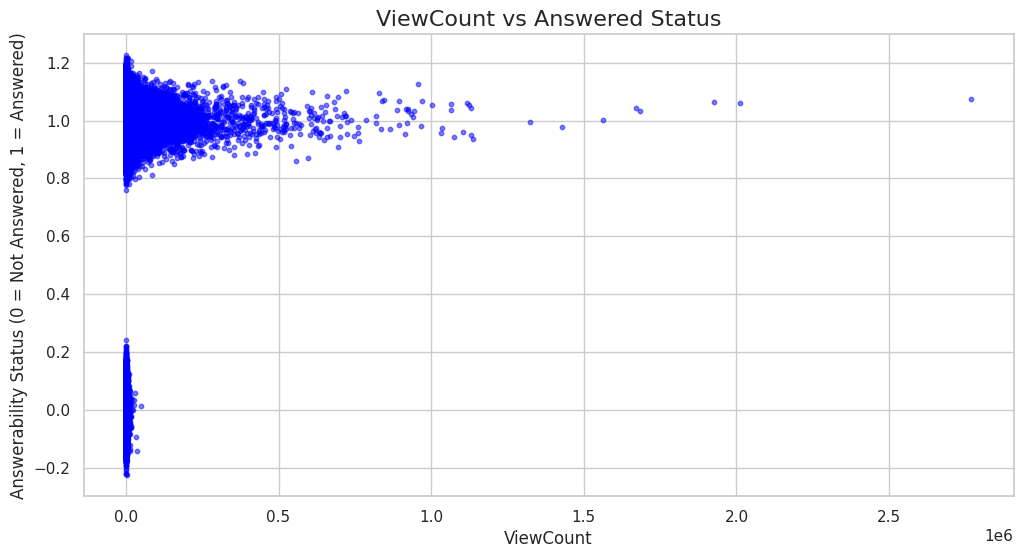

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

jittered_answered = df_clean['answered?'] + np.random.normal(0, 0.05, size=len(df_clean))

plt.figure(figsize=(12, 6))
plt.scatter(df_clean['ViewCount'], jittered_answered, alpha=0.5, color='blue', s=10)

plt.title('ViewCount vs Answered Status', fontsize=16)
plt.xlabel('ViewCount', fontsize=12)
plt.ylabel('Answerability Status (0 = Not Answered, 1 = Answered)', fontsize=12)

plt.show()

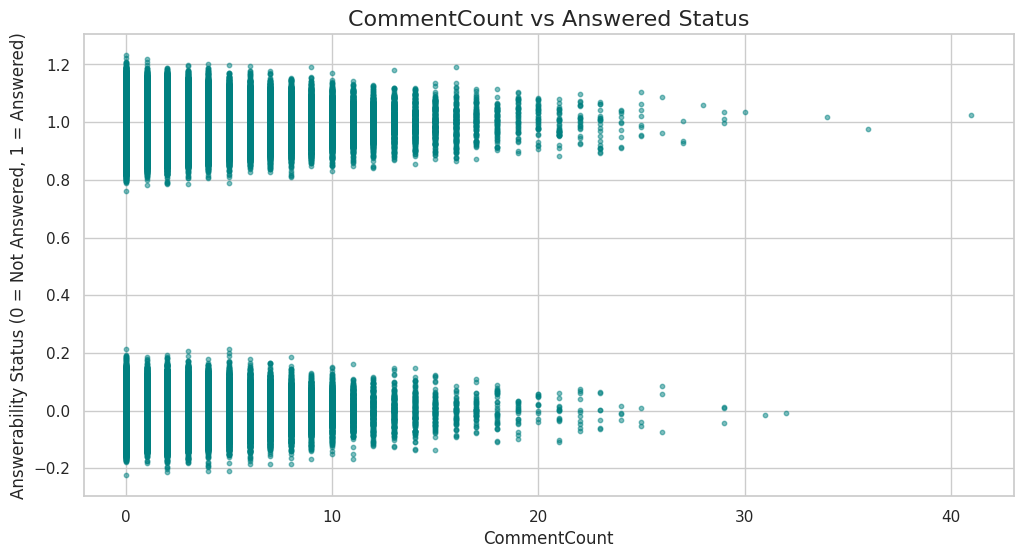

In [ ]:
jittered_answered = df_clean['answered?'] + np.random.normal(0, 0.05, size=len(df_clean))

plt.figure(figsize=(12, 6))
plt.scatter(df_clean['CommentCount'], jittered_answered, alpha=0.5, color='teal', s=10)

plt.title('CommentCount vs Answered Status', fontsize=16)
plt.xlabel('CommentCount', fontsize=12)
plt.ylabel('Answerability Status (0 = Not Answered, 1 = Answered)', fontsize=12)

plt.show()

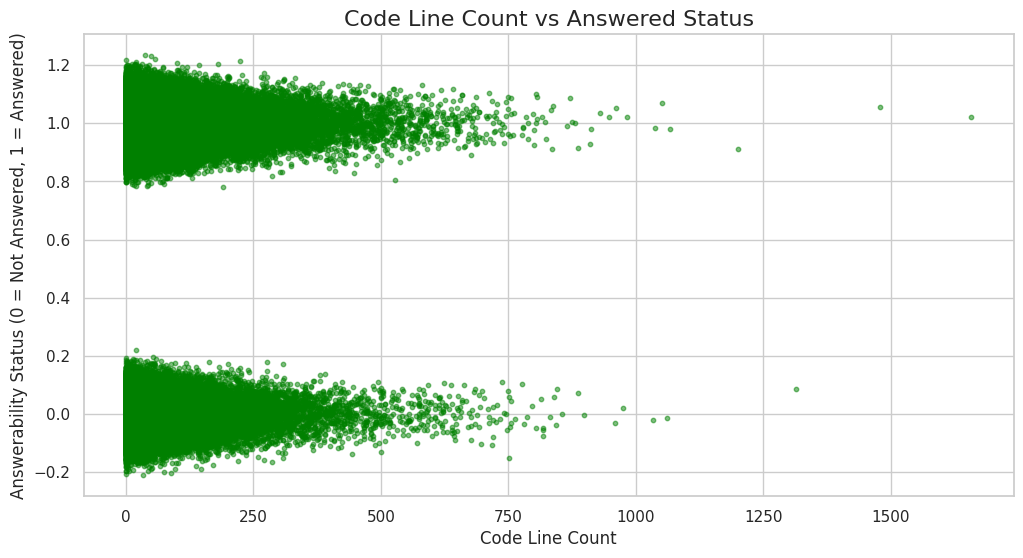

In [ ]:
jittered_answered = df_clean['answered?'] + np.random.normal(0, 0.05, size=len(df_clean))

plt.figure(figsize=(12, 6))
plt.scatter(df_clean['code_line_count'], jittered_answered, alpha=0.5, color='green', s=10)

plt.title('Code Line Count vs Answered Status', fontsize=16)
plt.xlabel('Code Line Count', fontsize=12)
plt.ylabel('Answerability Status (0 = Not Answered, 1 = Answered)', fontsize=12)

plt.show()

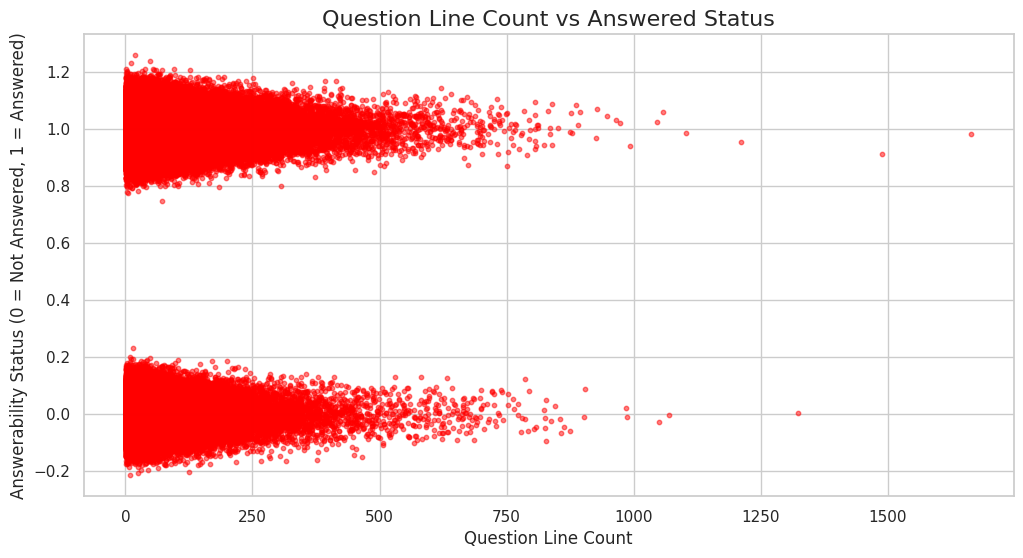

In [ ]:
jittered_answered = df_clean['answered?'] + np.random.normal(0, 0.05, size=len(df_clean))

plt.figure(figsize=(12, 6))
plt.scatter(df_clean['question_line_count'], jittered_answered, alpha=0.5, color='red', s=10)

plt.title('Question Line Count vs Answered Status', fontsize=16)
plt.xlabel('Question Line Count', fontsize=12)
plt.ylabel('Answerability Status (0 = Not Answered, 1 = Answered)', fontsize=12)

plt.show()

In [ ]:
from sklearn import metrics
R2 = metrics.r2_score(y_test, y_pred)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 : {0:.3f}".format(R2))
print("RMSE : {0:.3f}".format(rmse))

R2 : -0.264
RMSE : 0.447


In [ ]:
importance = logreg.coef_[0]
variables = ['CommentCount', 'ViewCount', 'code_snippet', 'sqrt_question_line_count', 'sqrt_code_line_count', 'image', 'log_Reputation']
for i, v in zip(variables, importance):
    print("Feature: %s, Score: %.5f" % (i, v))

Feature: CommentCount, Score: 0.37239
Feature: ViewCount, Score: -0.03685
Feature: code_snippet, Score: 0.10612
Feature: sqrt_question_line_count, Score: -0.39881
Feature: sqrt_code_line_count, Score: 15.14297
Feature: image, Score: -0.35073
Feature: log_Reputation, Score: 0.31834
